In [ ]:
# AI 6기 스터디 프로젝트 (2022.04.05 ~ )
# 태왕광과 날씨의 관계를 분석해본다.
# AI를 접목하여 미래의 발전량을 예측해본다

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
data = pd.read_csv('./한국동서발전(주)_태양광 발전량 현황_20210531.csv',encoding='cp949')

#data = pd.read_csv('./한국동서발전(주)_태양광 발전량 현황_20210531.csv')

idx_list = []

idx_cnt = 0


for el in data['발전기명']:
    
    if el == '광양항어울림태양광':
        idx_list.append(data.loc[idx_cnt,:])
    
    idx_cnt += 1

data_powerplant = pd.DataFrame(idx_list, columns = ['날짜','발전기명','설비용량(MW)','일발전량(Wh)'])
display(data_powerplant.head())

data_powerplant.to_csv('GYP_elect.csv', header=True, index=False, encoding='utf-8-sig')
# data_powerplant.to_csv('GYP_elect.csv', header=True, index=False)

,날짜,발전기명,설비용량(MW),일발전량(Wh)
0,2021-01-01,광양항어울림태양광,0.656,624000
1,2021-01-02,광양항어울림태양광,0.656,825120
2,2021-01-03,광양항어울림태양광,0.656,668640
3,2021-01-04,광양항어울림태양광,0.656,783840
4,2021-01-05,광양항어울림태양광,0.656,421920


In [3]:
data_weather = pd.read_csv('./weather.csv')
data_weather.head()

,stnId,tm,avgTa,minTa,maxTa,minRhm,avgTs,sumSsHr,avgCm20Te,avgM15Te,sumFogDur,sumRn
0,266,2021-01-01,-0.2,-4.4,5.0,44,-0.5,4.8,2.5,NaN,NaN,0.0
1,266,2021-01-02,0.7,-2.0,5.1,25,1.7,8.5,3.0,NaN,NaN,0.0
2,266,2021-01-03,1.2,-2.0,5.3,27,0.5,6.0,3.0,NaN,NaN,NaN
3,266,2021-01-04,2.7,-2.5,7.7,26,1.9,8.4,3.2,NaN,NaN,NaN
4,266,2021-01-05,1.6,-3.4,4.9,18,0.8,2.6,3.5,NaN,NaN,NaN


In [4]:
pd_join = pd.merge(data_weather, data_powerplant,  how = 'left' , left_on = "tm",  right_on = "날짜")
data_set = pd.DataFrame(pd_join, columns = ['날짜','발전기명','설비용량(MW)','일발전량(Wh)', 'avgTa', 'minTa', 'maxTa', 'minRhm', 'avgTs', 'sumSsHr', 'avgCm20Te'])
data_set.describe(include='object')
data_set.count()

날짜           151
발전기명         151
설비용량(MW)     151
일발전량(Wh)     151
avgTa        151
minTa        151
maxTa        151
minRhm       151
avgTs        151
sumSsHr      149
avgCm20Te    150
dtype: int64

In [5]:
# 데이터 전처리
data_set['sumSsHr'] = data_set['sumSsHr'].fillna(0)
data_set['avgCm20Te'] = data_set['avgCm20Te'].fillna(0)
data_set.to_csv('result.csv', header=True, index=False, encoding='utf-8-sig',)
data_set.head(5)

,날짜,발전기명,설비용량(MW),일발전량(Wh),avgTa,minTa,maxTa,minRhm,avgTs,sumSsHr,avgCm20Te
0,2021-01-01,광양항어울림태양광,0.656,624000,-0.2,-4.4,5.0,44,-0.5,4.8,2.5
1,2021-01-02,광양항어울림태양광,0.656,825120,0.7,-2.0,5.1,25,1.7,8.5,3.0
2,2021-01-03,광양항어울림태양광,0.656,668640,1.2,-2.0,5.3,27,0.5,6.0,3.0
3,2021-01-04,광양항어울림태양광,0.656,783840,2.7,-2.5,7.7,26,1.9,8.4,3.2
4,2021-01-05,광양항어울림태양광,0.656,421920,1.6,-3.4,4.9,18,0.8,2.6,3.5


In [6]:
# 데이터 성질, 통계 분석
data_set.shape
data_set['days'] = np.arange(data_set.shape[0])
data_set.head(5)

,날짜,발전기명,설비용량(MW),일발전량(Wh),avgTa,minTa,maxTa,minRhm,avgTs,sumSsHr,avgCm20Te,days
0,2021-01-01,광양항어울림태양광,0.656,624000,-0.2,-4.4,5.0,44,-0.5,4.8,2.5,0
1,2021-01-02,광양항어울림태양광,0.656,825120,0.7,-2.0,5.1,25,1.7,8.5,3.0,1
2,2021-01-03,광양항어울림태양광,0.656,668640,1.2,-2.0,5.3,27,0.5,6.0,3.0,2
3,2021-01-04,광양항어울림태양광,0.656,783840,2.7,-2.5,7.7,26,1.9,8.4,3.2,3
4,2021-01-05,광양항어울림태양광,0.656,421920,1.6,-3.4,4.9,18,0.8,2.6,3.5,4


C:\Users\sangt\AppData\Local\Temp\ipykernel_5892\76665323.py:15: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.savefig("./output/gdp_per_capita.png")#, dpi=600)
C:\Users\sangt\AppData\Local\Temp\ipykernel_5892\76665323.py:15: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  plt.savefig("./output/gdp_per_capita.png")#, dpi=600)
C:\Users\sangt\AppData\Local\Temp\ipykernel_5892\76665323.py:15: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  plt.savefig("./output/gdp_per_capita.png")#, dpi=600)
C:\Users\sangt\AppData\Local\Temp\ipykernel_5892\76665323.py:15: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.savefig("./output/gdp_per_capita.png")#, dpi=600)
C:\Users\sangt\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io

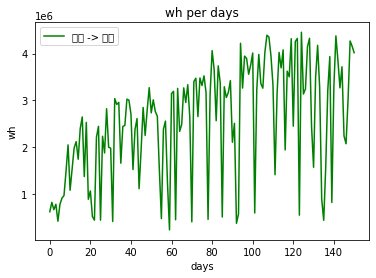

In [8]:
# 시각화
import matplotlib.pyplot as plt

days = data_set['days']
dayspower = data_set['일발전량(Wh)']

# x축: 연도, y축: GDP
plt.plot(days, dayspower, color='green', linestyle='solid')

plt.title("wh per days")
plt.xlabel("days")
plt.ylabel("wh")
plt.legend(labels=['서울 -> 경기'], loc='best')     #범례 표시

plt.savefig("./output/gdp_per_capita.png")#, dpi=600)
plt.show()

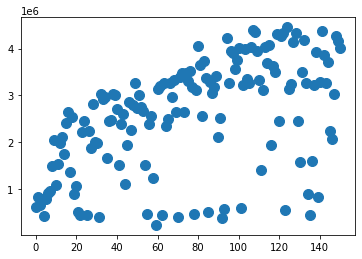

In [9]:
# 발전량
x = data_set['days']
y = data_set['일발전량(Wh)']

# 그래피로 그려본다.
plt.scatter(x, y, s = 100)
plt.show()

C:\Users\sangt\anaconda3\envs\tensorflow\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.draw()
C:\Users\sangt\anaconda3\envs\tensorflow\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.draw()
C:\Users\sangt\anaconda3\envs\tensorflow\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
C:\Users\sangt\anaconda3\envs\tensorflow\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
C:\Users\sangt\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sangt\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\pyla

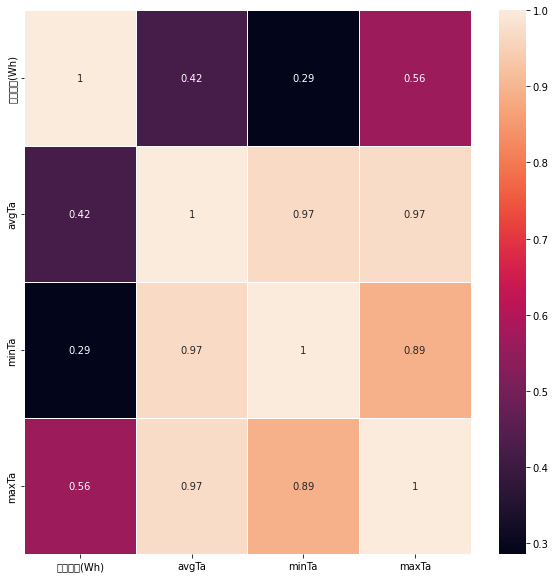

In [10]:
# 피어슨 상관계수 ( Pearson Correlation Coefficient) 사용하여 관계 분석
# -1 음의 상관계수, 0 상관없음, 1 양의 상관계수 

import seaborn as sns
data_sns = data_set.iloc[:,3:7]

data_sns = data_sns.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=data_sns, annot=True, linewidths=.5, ax=ax)
plt.show()

In [11]:
from tensorflow import keras

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [12]:
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분
np.random.seed(3)
tf.random.set_seed(3)

# 최종적으로 일 발전량(wh)이 목표이므로 컬럼을 재 정의 해준다.
data_set = data_set[['avgTa','minTa','maxTa','minRhm','avgTs', 'sumSsHr', 'avgCm20Te', '일발전량(Wh)']]

# 날씨와 결과를 X, Y로 구분하여 저장
print(data_set.shape)

#X = data_set[:,0:1]
X = data_set.iloc[:, 0:7]

Y = data_set.iloc[:,-1]   

print(Y)

(151, 8)
0       624000
1       825120
2       668640
3       783840
4       421920
        ...   
146    2076000
147    3024480
148    4270080
149    4157760
150    4020480
Name: 일발전량(Wh), Length: 151, dtype: int64


In [13]:
# 마지막 column이 일 발전량(wh)
seed = 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed)
X_train

# 모델을 설정하고 실행
model = keras.Sequential()
model.add(keras.layers.Dense(30, input_dim = 7, activation = 'relu'))
model.add(keras.layers.Dense(20, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'relu'))
                     
# 분류가 아니기 때문에, sigmoid, softmax없이 각 node마다 1:1로 비교한다.
model.add(keras.layers.Dense(1, activation = 'linear'))

model.summary()

model.compile(loss='mean_squared_error', optimizer = 'adam', metrics = 'mse')
history = model.fit(X_train, Y_train, epochs = 200, batch_size = 150, validation_split = 0.3)
               

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                240       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,081
Trainable params: 1,081
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 0s 422ms/step - loss: 8312288444416.0000 - mse: 8312288444416.0000 - val_loss: 8554342776832.0000 - val_mse: 8554342776832.0000
Epoch 2

In [16]:
# 값 실제 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(len(Y_test)):
    label = Y_test.iloc[i]
    prediction = Y_prediction[i]
    print("실제발전량: {:.3f} , 예상발전량 {:.3f}".format(label, prediction))

실제발전량: 2252640.000 , 예상발전량 1297.724
실제발전량: 783840.000 , 예상발전량 1146.307
실제발전량: 415680.000 , 예상발전량 1911.756
실제발전량: 444960.000 , 예상발전량 2405.048
실제발전량: 2402400.000 , 예상발전량 1253.101
실제발전량: 3504960.000 , 예상발전량 2389.554
실제발전량: 3424800.000 , 예상발전량 2034.849
실제발전량: 915360.000 , 예상발전량 897.015
실제발전량: 3983520.000 , 예상발전량 1898.812
실제발전량: 2487840.000 , 예상발전량 2319.186
실제발전량: 3172800.000 , 예상발전량 1927.963
실제발전량: 3028320.000 , 예상발전량 1018.353
실제발전량: 377280.000 , 예상발전량 3069.961
실제발전량: 2662560.000 , 예상발전량 1195.270
실제발전량: 3286080.000 , 예상발전량 3046.190
실제발전량: 2709600.000 , 예상발전량 1126.307
실제발전량: 3475200.000 , 예상발전량 2136.551
실제발전량: 441600.000 , 예상발전량 4446.379
실제발전량: 4026720.000 , 예상발전량 2750.119
실제발전량: 2383200.000 , 예상발전량 1619.446
실제발전량: 3247200.000 , 예상발전량 2508.405
실제발전량: 3125280.000 , 예상발전량 2600.501
실제발전량: 4379520.000 , 예상발전량 3153.040
실제발전량: 3525600.000 , 예상발전량 2445.524
실제발전량: 781440.000 , 예상발전량 1135.916
실제발전량: 3951360.000 , 예상발전량 2048.577
실제발전량: 898080.000 , 예상발전량 3946.199
실제발전량: 2957760.000 , 예상발전량 1930.298
실

In [17]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

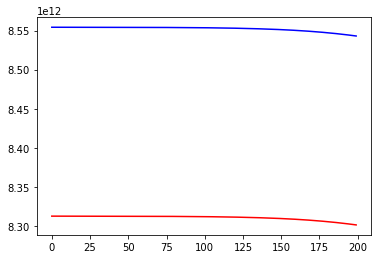

In [18]:
plt.plot(history.history['loss'], c = 'r')
plt.plot(history.history['val_loss'], c='b')
plt.show()

In [ ]:
# 끝으로 참조할만한 논문
# http://www.riss.kr/search/detail/DetailView.do?p_mat_type=be54d9b8bc7cdb09&control_no=712c45e67682dd03ffe0bdc3ef48d419&outLink=K